In [193]:
from io import open
import glob
import os
import random
import unicodedata
import string

import matplotlib.pyplot as plt

import torch
import torch.nn as nn

In [194]:
FILE_PATH = "datasets/names/*.txt"

In [195]:
print(glob.glob(FILE_PATH))

['datasets/names\\Arabic.txt', 'datasets/names\\Chinese.txt', 'datasets/names\\Czech.txt', 'datasets/names\\Dutch.txt', 'datasets/names\\English.txt', 'datasets/names\\French.txt', 'datasets/names\\German.txt', 'datasets/names\\Greek.txt', 'datasets/names\\Irish.txt', 'datasets/names\\Italian.txt', 'datasets/names\\Japanese.txt', 'datasets/names\\Korean.txt', 'datasets/names\\Polish.txt', 'datasets/names\\Portuguese.txt', 'datasets/names\\Russian.txt', 'datasets/names\\Scottish.txt', 'datasets/names\\Spanish.txt', 'datasets/names\\Vietnamese.txt']


In [196]:
eos = "/"

all_letters = string.ascii_letters + " .'" + eos
n_letters = len(all_letters)

all_letters, n_letters

("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ .'/", 56)

In [197]:
eos_index = n_letters - 1
eos_index

55

In [198]:
def unicode_to_ascii(s):
    return "".join(
        c
        for c in unicodedata.normalize("NFD", s)
        if unicodedata.category(c) != "Mn" and c in all_letters
    )

In [199]:
print(unicode_to_ascii("Król"))

Krol


In [200]:
def find_files(path):
    return glob.glob(path)

In [201]:
total_names = 0
language_names = {}
all_languages = []

for filename in find_files(FILE_PATH):
    language = os.path.splitext(os.path.basename(filename))[0]
    all_languages.append(language)
    names_in_file = open(filename, encoding="utf-8").read().strip().split("\n")
    names = [unicode_to_ascii(name) for name in names_in_file]
    language_names[language] = names
    total_names += len(names)

In [202]:
all_languages

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [203]:
n_languages = len(all_languages)
n_languages

18

In [204]:
total_names

20074

In [205]:
print(language_names["Spanish"][:5])

['Abana', 'Abano', 'Abarca', 'Abaroa', 'Abascal']


In [206]:
print(language_names["German"][-5:])

['Xylander', 'Zellweger', 'Zilberschlag', 'Zimmerman', 'Zimmermann']


In [207]:
def letter_to_tensor(letter):
    tensor = torch.zeros(1, n_letters)
    tensor[0][all_letters.find(letter)] = 1
    return tensor

In [208]:
print(letter_to_tensor("b"))

tensor([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0.]])


In [209]:
def input_name_to_tensor(name):
    tensor = torch.zeros(len(name), 1, n_letters)

    for li, letter in enumerate(name):
        tensor[li][0][all_letters.find(letter)] = 1

    return tensor

In [210]:
anna_input_tensor = input_name_to_tensor("Anna")
anna_input_tensor.size()

torch.Size([4, 1, 56])

In [211]:
anna_input_tensor

tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]],

        [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0

In [212]:
def target_name_to_tensor(name):
    letter_indexes = [all_letters.find(name[li]) for li in range(1, len(name))]

    letter_indexes.append(eos_index)

    return torch.LongTensor(letter_indexes)

In [213]:
print(target_name_to_tensor("Anna"))

tensor([13, 13,  0, 55])


In [214]:
print(target_name_to_tensor("Simon"))

tensor([ 8, 12, 14, 13, 55])


In [215]:
def language_to_tensor(language):
    li = all_languages.index(language)

    category_tensor = torch.zeros(1, n_languages)
    category_tensor[0][li] = 1

    return category_tensor

In [216]:
print(language_to_tensor("Czech"))

tensor([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [217]:
print(language_to_tensor("English"))

tensor([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])


In [218]:
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()

        self.hidden_size = hidden_size

        self.i2h = nn.Linear(n_languages + input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(n_languages + input_size + hidden_size, output_size)

        self.o2o = nn.Linear(hidden_size + output_size, output_size)

        self.dropout = nn.Dropout(0.2)
        self.log_softmax = nn.LogSoftmax(dim=1)

    def forward(self, language, input_t, hidden):
        input_combined = torch.cat((language, input_t, hidden), 1)
        
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)

        output_combined = torch.cat((hidden, output), 1)

        output = self.o2o(output_combined)
        output = self.dropout(output)

        output = self.log_softmax(output)

        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

In [219]:
n_hidden = 256

rnn = RNN(n_letters, n_hidden, n_letters)

In [220]:
language = language_to_tensor('English')

input_t = letter_to_tensor('S')

hidden = torch.zeros(1, n_hidden)

output, next_hidden = rnn(language, input_t, hidden)

print('output size =', output.size())
print('next_hidden size = ', next_hidden.size())

output size = torch.Size([1, 56])
next_hidden size =  torch.Size([1, 256])


In [221]:
def letter_from_output(output):
    _, top_i = output.topk(1)
    letter_i = top_i[0].item()
    return all_letters[letter_i], letter_i

In [222]:
letter_from_output(output)

('k', 10)

In [223]:
def random_training_example():
    random_language_index = random.randint(0, n_languages - 1)
    language = all_languages[random_language_index]

    random_language_names = language_names[language]
    name = random_language_names[random.randint(0, len(random_language_names) - 1)]

    language_tensor = language_to_tensor(language)

    input_name_tensor = input_name_to_tensor(name)
    target_name_tensor = target_name_to_tensor(name)

    #print(language, name)

    return language_tensor, input_name_tensor, target_name_tensor

In [224]:
random_training_example()

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]]),
 tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0., 0., 0.]],
 
         [[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 0

In [225]:
criterion = nn.NLLLoss()
learning_rate = 0.0005

In [226]:
def train(language_tensor, input_name_tensor, target_name_tensor):
    target_name_tensor.unsqueeze_(-1)
    hidden = rnn.initHidden()
    rnn.zero_grad()
    loss = 0

    for i in range(input_name_tensor.size(0)):
        output, hidden = rnn(language_tensor, input_name_tensor[i], hidden)
        l = criterion(output, target_name_tensor[i])
        loss += l

    loss.backward()

    for p in rnn.parameters():
        p.data.add_(-learning_rate, p.grad.data)

    return output, loss.item() / input_name_tensor.size(0)

In [227]:
n_iters = 400000
current_loss = 0
all_losses = []

In [228]:
for iteration in range(1, n_iters + 1):
    language_tensor, input_name_tensor, target_name_tensor = random_training_example()
    output, loss = train(language_tensor, input_name_tensor, target_name_tensor)
    current_loss += loss

    if iteration % 500 == 0:
        print('(%d %d%%) %.4f' % (iteration, iteration / n_iters * 100, loss))

    if iteration % 1000 == 0:
        all_losses.append(current_loss / 1000)
        current_loss = 0

(500 0%) 3.8563
(1000 0%) 3.5446
(1500 0%) 4.0469
(2000 0%) 2.9026
(2500 0%) 3.5070
(3000 0%) 3.5949
(3500 0%) 2.5913
(4000 1%) 3.5099
(4500 1%) 3.1187
(5000 1%) 3.1189
(5500 1%) 2.3300
(6000 1%) 3.1310
(6500 1%) 3.1796
(7000 1%) 2.5174
(7500 1%) 3.0897
(8000 2%) 2.8977
(8500 2%) 3.0538
(9000 2%) 3.4526
(9500 2%) 2.6927
(10000 2%) 2.6582
(10500 2%) 2.8202
(11000 2%) 2.4644
(11500 2%) 2.7164
(12000 3%) 2.9656
(12500 3%) 2.7206
(13000 3%) 2.4602
(13500 3%) 2.4330
(14000 3%) 3.0003
(14500 3%) 2.9720
(15000 3%) 2.6881
(15500 3%) 2.4302
(16000 4%) 3.4897
(16500 4%) 3.7321
(17000 4%) 3.3893
(17500 4%) 2.0123
(18000 4%) 2.7845
(18500 4%) 1.9710
(19000 4%) 2.2384
(19500 4%) 2.4238
(20000 5%) 2.4351
(20500 5%) 2.7009
(21000 5%) 1.6733
(21500 5%) 3.3215
(22000 5%) 3.0796
(22500 5%) 2.7074
(23000 5%) 1.8281
(23500 5%) 2.4746
(24000 6%) 2.2802
(24500 6%) 1.7656
(25000 6%) 2.7016
(25500 6%) 3.4853
(26000 6%) 3.1808
(26500 6%) 2.9166
(27000 6%) 3.0133
(27500 6%) 3.9097
(28000 7%) 2.7117
(28500 7%) 1

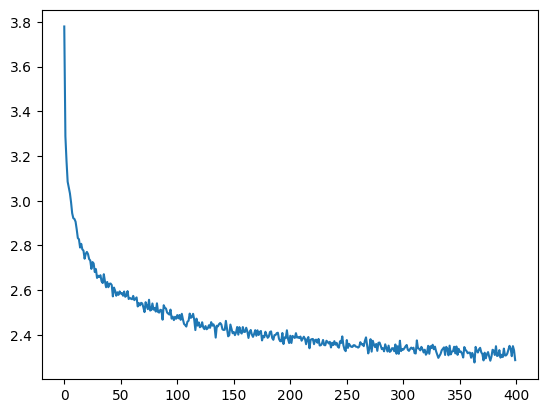

In [229]:
plt.figure()
plt.plot(all_losses);

In [230]:
max_length = 12

def sample(language, start_letter='A'):

    rnn.eval()

    with torch.no_grad():
        language_tensor = language_to_tensor(language)

        input_t = input_name_to_tensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(language_tensor, input_t[0], hidden)
            letter = letter_from_output(output)[0]

            if letter == eos:
                break
            else:
                output_name += letter
            
            input_t = input_name_to_tensor(letter)

        return output_name

In [231]:
sample(language='English', start_letter='B')

'Ballon'

In [232]:
sample(language='German', start_letter='H')

'Hander'